O conjunto de dados de manutenção preditiva AI4I 2020, é um conjunto de dados sintético, que reflete dados reais de manutenção preditiva encontrados na indústria. Neste projeto será feito, uma análise exploratória, e modelo de machine learning de classificação, utilizando o algortimo de regressão logística, para prever a variável "Machine Failure".



Link dataset: https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

Os dados carregados contêm as seguintes colunas:

UDI: Parece ser um identificador único para cada entrada.

Product ID: Identificação do produto.

Type: Tipo de produto.

Air temperature [K]: Temperatura do ar.

Process temperature [K]: Temperatura do processo.

Rotational speed [rpm]: Velocidade de rotação.

Torque [Nm]: Torque.

Tool wear [min]: Desgaste da ferramenta em minutos.

Machine failure: Falha da máquina (0 para não falha, 1 para falha).

TWF, HDF, PWF, OSF, RNF: Parecem ser indicadores ou tipos de falhas.

In [2]:
import pandas as pd

# Carregando os dados
df = pd.read_csv('/content/drive/MyDrive/Dataseet Manutencao Fresadora/ai4i2020.csv')

# Exibindo as primeiras linhas do dataframe
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
# Verificando valores ausentes
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

Nâo temos valores ausentes em nenhuma das colunas.

---



In [ ]:
# Obtendo estatísticas descritivas
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Air temperature [K]: A temperatura do ar varia de 295,3 K a 304,5 K, com uma média de aproximadamente 300 K.

Process temperature [K]: A temperatura do processo varia de 305,7 K a 313,8 K, com uma média de aproximadamente 310 K.

Rotational speed [rpm]: A velocidade de rotação varia de 1168 rpm a 2886 rpm.

Torque [Nm]: O torque varia de 3,8 Nm a 76,6 Nm, com uma média de aproximadamente 40 Nm.

Tool wear [min]: O desgaste da ferramenta varia de 0 a 253 minutos, com uma média de 108 minutos.

Machine failure: A maioria das entradas indica que não houve falha da máquina (média de 0,0339, o que significa que apenas cerca de 3,39% das entradas tiveram falhas).

TWF, HDF, PWF, OSF, RNF: Estas colunas parecem ser variáveis binárias (0 ou 1) indicando diferentes tipos de falhas ou eventos. A maioria das entradas para estas colunas é 0, o que indica que tais eventos são raros.

A seguir, vamos verificar a distribuição de Type e Machine failure.


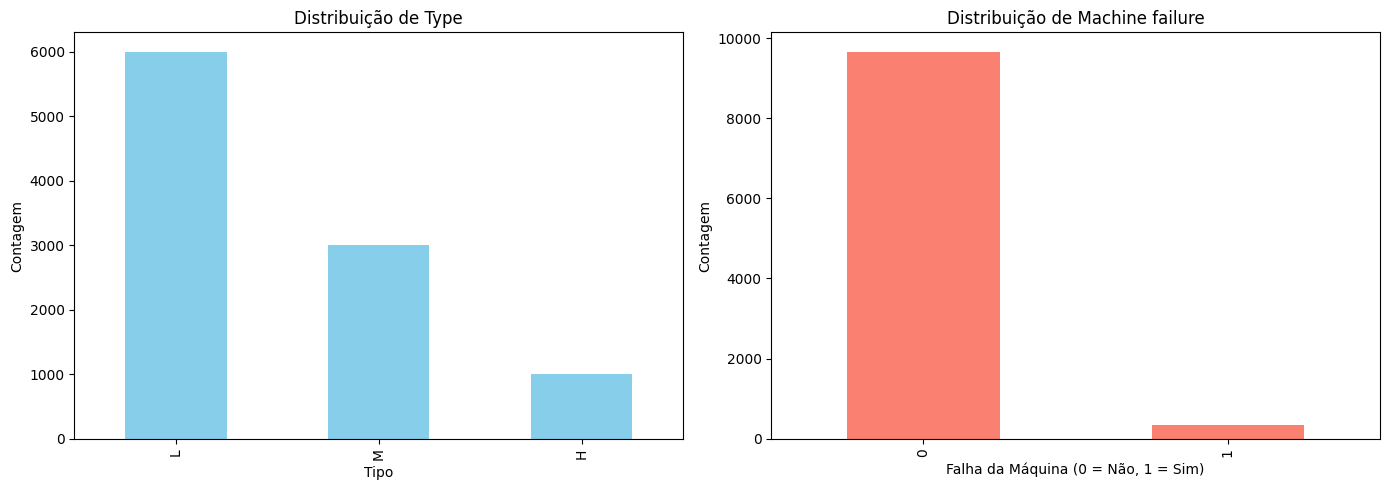

In [ ]:
import matplotlib.pyplot as plt

# Plotando a distribuição de 'Type'
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

df['Type'].value_counts().plot(kind='bar', ax=ax[0], color='skyblue')
ax[0].set_title('Distribuição de Type')
ax[0].set_ylabel('Contagem')
ax[0].set_xlabel('Tipo')

# Plotando a distribuição de 'Machine failure'
df['Machine failure'].value_counts().plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title('Distribuição de Machine failure')
ax[1].set_ylabel('Contagem')
ax[1].set_xlabel('Falha da Máquina (0 = Não, 1 = Sim)')

plt.tight_layout()
plt.show()

Agora, vamos visualizar a distribuição das falhas para ter uma ideia mais clara de sua frequência. Faremos isso usando gráficos de barra.

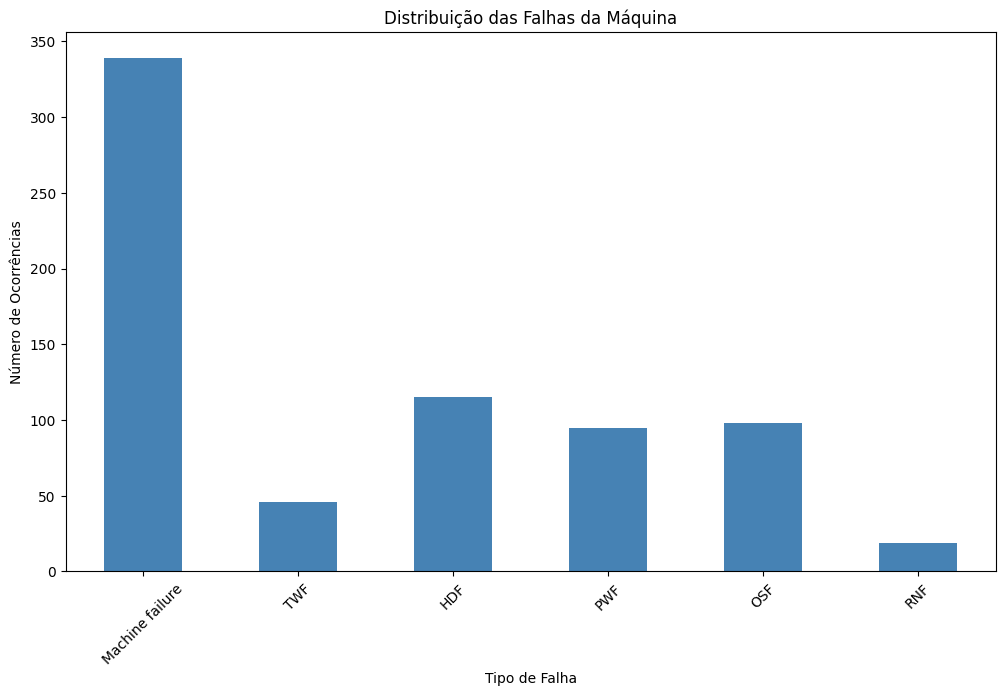

In [ ]:
# Contagem de cada tipo de falha
failure_counts = df[['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()

# Plotando gráfico de barra
plt.figure(figsize=(12, 7))
failure_counts.plot(kind='bar', color='steelblue')
plt.title('Distribuição das Falhas da Máquina')
plt.ylabel('Número de Ocorrências')
plt.xlabel('Tipo de Falha')
plt.xticks(rotation=45)
plt.show()

O gráfico de barras mostra a distribuição das falhas da máquina:

Falha da Máquina (Machine failure): Como esperado, este é o tipo de falha mais comum, pois é uma categoria geral que engloba todas as falhas.

Falha relacionada à ferramenta (TWF): Este é um dos tipos menos comuns de falha.

HDF: Tem uma frequência um pouco maior em comparação com TWF, PWF, OSF e RNF, mas ainda é menos comum do que a falha geral da máquina.

PWF e OSF: Estes têm frequências semelhantes e são um pouco menos comuns do que HDF.

RNF: Este é o tipo de falha menos comum entre todas as categorias.

In [ ]:
# Calculando a matriz de correlação
df.corr()

<ipython-input-8-a707b1dd92fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,0.009154,-0.022215,-0.023557,-0.000990,-0.005954
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine failure,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009154,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970
HDF,-0.022215,0.137831,0.056933,-0.121241,0.142610,-0.001287,0.575800,-0.007332,1.000000,0.018443,0.046396,-0.004706
PWF,-0.023557,0.003470,-0.003355,0.123018,0.083781,-0.009334,0.522812,0.008577,0.018443,1.000000,0.115836,-0.004273


<ipython-input-12-2c5574b4778d>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)


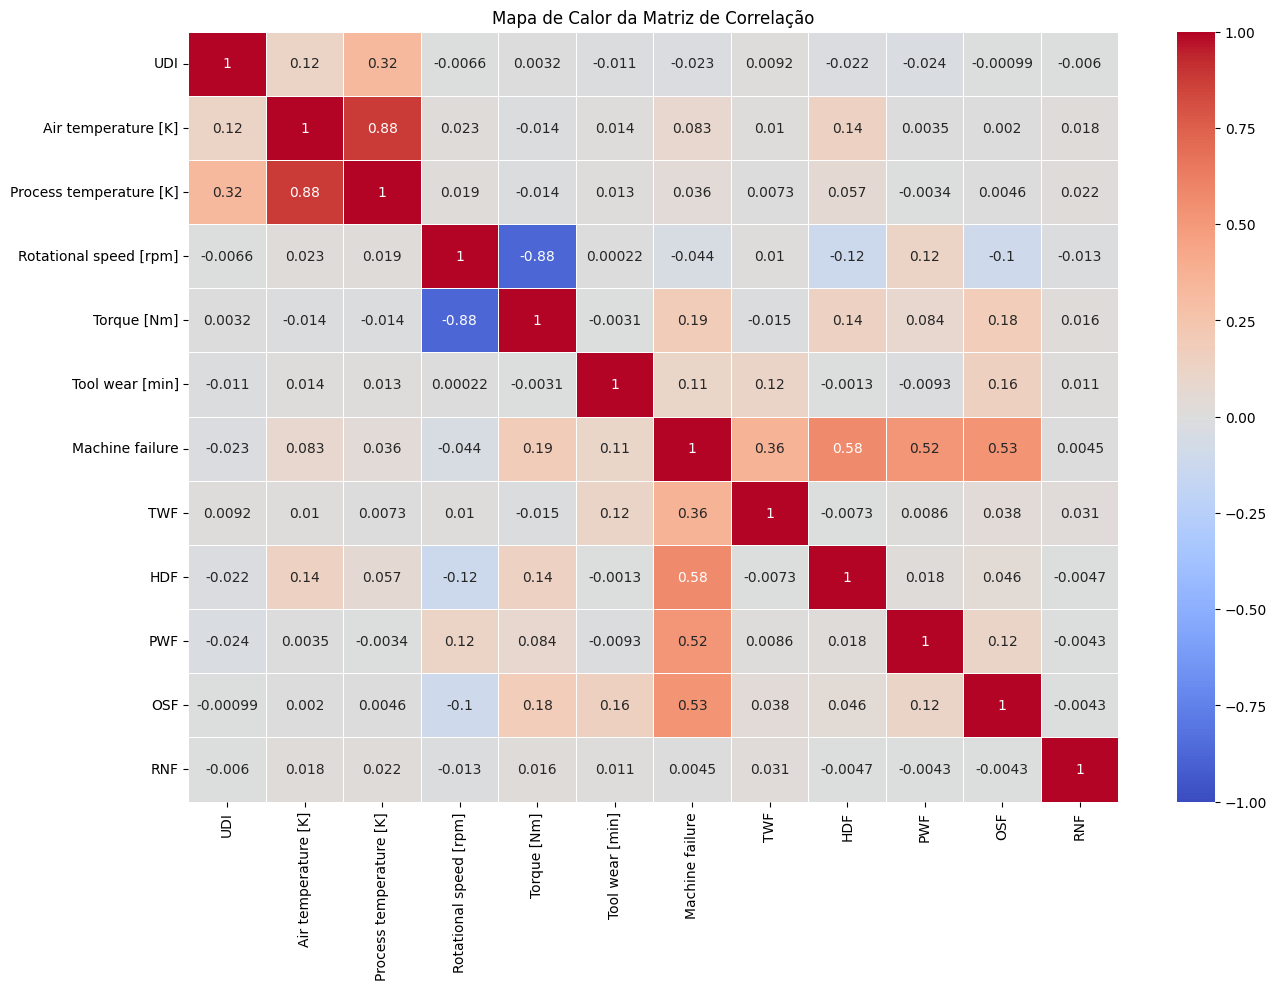

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o tamanho da figura
plt.figure(figsize=(15, 10))

# Criando o heatmap da matriz de correlação
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)

# Adicionando título e mostrando o gráfico
plt.title('Mapa de Calor da Matriz de Correlação')
plt.show()

Aqui estão algumas observações com base na matriz de correlação:

Temperatura do Ar e Temperatura do Processo: Há uma correlação muito forte (0,876) entre a temperatura do ar e a temperatura do processo, indicando que quando uma sobe, a outra também tende a subir.

Velocidade de Rotação e Torque: Há uma correlação negativa forte (-0,875) entre a velocidade de rotação e o torque. Isso sugere que quando a velocidade de rotação aumenta, o torque tende a diminuir, e vice-versa.

Falha da Máquina e TWF, HDF, PWF, OSF: A falha da máquina possui correlações positivas moderadas com TWF (0,363), HDF (0,576), PWF (0,523) e OSF (0,531). Isso indica que quando há uma falha na máquina, é provável que esteja relacionada a uma dessas categorias específicas de falha.

Desgaste da Ferramenta e Falha da Máquina: Há uma correlação positiva moderada (0,105) entre o desgaste da ferramenta e a falha da máquina, sugerindo que à medida que o desgaste da ferramenta aumenta, a probabilidade de falha da máquina também pode aumentar.

Torque e Falha da Máquina: Existe uma correlação positiva moderada (0,191) entre o torque e a falha da máquina.

Outras correlações são relativamente baixas, o que indica que podem não ter uma relação linear significativa entre elas.

Criar um modelo de classificação usando o algoritmo de regressão logistíca para prever a coluna Machine failure.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Definir colunas a serem removidas e colunas a serem codificadas
cols_to_drop = ['UDI', 'Product ID']
cols_to_encode = ['Type']

# Dividir os dados em features (X) e target (y)
X = df.drop(columns=cols_to_drop + ['Machine failure'])
y = df['Machine failure']

# Criar um transformer de colunas para codificar e normalizar
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns),
        ('cat', OneHotEncoder(drop='first'), cols_to_encode)
    ])

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Aplicar o pré-processamento
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

X_train.shape, X_test.shape

((8000, 12), (2000, 12))

Os dados foram preparados com sucesso. Agora, temos um total de 8000 amostras em nosso conjunto de treinamento, com 5 características (conforme especificado em feature_columns).

Vamos agora construir, treinar e avaliar o modelo Gradient Boosting para prever a variável Machine Failure.

In [6]:
from sklearn.linear_model import LogisticRegression

# Criar e treinar o modelo de regressão logística
logreg = LogisticRegression(solver='liblinear', random_state=42)
logreg.fit(X_train, y_train)

# Avaliar a acurácia do modelo nos conjuntos de treino e teste
train_accuracy = logreg.score(X_train, y_train)
test_accuracy = logreg.score(X_test, y_test)

train_accuracy, test_accuracy

(0.999125, 0.999)

O modelo de regressão logística alcançou os seguintes resultados:

Acurácia no conjunto de treino: 99.91%

Acurácia no conjunto de teste: 99.9%

Estas são acurácias muito altas. No entanto, é importante lembrar que nosso conjunto de dados está desequilibrado, com uma grande proporção de exemplos sem falhas de máquina. Portanto, a acurácia sozinha pode não ser uma boa métrica para avaliar o desempenho do modelo.

Calcular outras métricas, como a matriz de confusão, precisão, recall e F1-score, para ter uma visão mais completa do desempenho do modelo.

In [7]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Prever os valores para o conjunto de teste
y_pred = logreg.predict(X_test)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular precisão, recall e F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

conf_matrix, precision, recall, f1

(array([[1932,    0],
        [   2,   66]]),
 1.0,
 0.9705882352941176,
 0.9850746268656716)

Aqui estão os resultados e a análise detalhada:

Matriz de Confusão: 1932 previsões verdadeiro negativo (TN), 66 verdadeiro positivo (TP), 2 falso negativo (FN) e 0 falso positivo (FP).

Precisão: 1.0 (Isso significa que quando o modelo prevê uma falha, ele está correto 100% das vezes.)

Recall: 0.9706 (Isso significa que o modelo identifica 97.06% das falhas reais.)

F1-score**: 0.9851 (Média harmônica de precisão e recall.)

Estes são resultados muito promissores. O modelo parece ser capaz de identificar falhas de máquina com alta precisão e recall.

A seguir, vamos analisar as variáveis mais significativas para o algoritmo, olhando para os coeficientes do modelo.

In [8]:
# Obter os nomes das features após o pré-processamento
feature_names = list(df.select_dtypes(include=['float64', 'int64']).columns)
feature_names.remove('Machine failure')
feature_names.extend(['Type_M'])  # Coluna adicionada após a codificação one-hot

# Obter os coeficientes do modelo
coefficients = logreg.coef_[0]

# Criar um DataFrame para apresentar os coeficientes em ordem decrescente de magnitude
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
7,HDF,1.374767
8,PWF,1.356610
6,TWF,1.346034
5,Tool wear [min],0.922895
0,UDI,0.382688
3,Rotational speed [rpm],0.195724
2,Process temperature [K],-0.010240
9,OSF,-0.039840
4,Torque [Nm],-0.048355
1,Air temperature [K],-0.090973


As variáveis em ordem de sua magnitude de influência sobre a previsão:

HDF, PWF e TWF: Estes são indicadores ou tipos de falhas e têm os maiores coeficientes positivos, indicando que estão fortemente associados a falhas na máquina.

Tool wear [min]: O desgaste da ferramenta também tem uma forte associação positiva com falhas.

UDI: Tem um coeficiente positivo, indicando alguma associação com falhas, embora possa ser menos direto.

Rotational speed [rpm]: Velocidade de rotação também tem uma associação positiva.

Process temperature [K], OSF, Torque [Nm] e Air temperature [K]: Essas variáveis têm coeficientes negativos, indicando que valores mais altos dessas variáveis estão associados a uma menor probabilidade de falha.

Type_M: Esta é a variável codificada a partir da coluna 'Type'. Ter um valor de 'M' para o tipo está associado a uma menor probabilidade de falha.

RNF: Tem o maior coeficiente negativo, indicando uma forte associação negativa com falhas.

Conclusões

O modelo de regressão logística construído tem um desempenho muito bom na previsão de falhas de máquina, com alta precisão e recall.

Indicadores de falha, como HDF, PWF e TWF, são os preditores mais significativos de falhas na máquina.

Outras variáveis, como desgaste da ferramenta e velocidade de rotação, também desempenham um papel importante na previsão.

O desequilíbrio de classes foi considerado ao dividir os dados em conjuntos de treino e teste usando a estratificação.

Pode ser benéfico explorar técnicas de reamostragem ou outros algoritmos de classificação para verificar se o desempenho pode ser ainda melhorado ou se os resultados se mantêm consistentes.